<a href="https://colab.research.google.com/github/uday96/EVA4-TSAI/blob/master/S13/EVA4_S13_Solution_YoloV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone -b minion https://github.com/uday96/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 1164, done.
remote: Total 1164 (delta 0), reused 0 (delta 0), pack-reused 1164
Receiving objects: 100% (1164/1164), 23.20 MiB | 19.48 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


In [6]:
cd YoloV3/

/content/YoloV3


Use pre-trained weights to perform transfer learning

In [0]:
!mkdir weights

In [0]:
!cp "/content/gdrive/My Drive/EVA4-Workspace/yolov3-spp-ultralytics.pt" "weights/"

Check if the model is training or not

In [9]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 04:54:49.147759: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 4444.06it/s]
Caching images (0.0GB): 100% 20/20 [00:00<00:00, 99.17it/s]
Caching labels (20 found, 0 missing, 0 empty, 0 duplicate, for 20 images): 100% 20/20 [00:00<00:00, 

Perform transfer learning on our custom minion dataset

In [13]:
!python train.py --data data/customdata/custom.data --batch 25 --cache --cfg cfg/yolov3-custom.cfg --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=25, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-25 05:00:10.591538: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 5879.25it/s]
Caching images (0.3GB): 100% 500/500 [00:01<00:00, 277.72it/s]
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/5

Perform detection on the training/validation data

In [14]:
!python detect.py --conf-thres 0.1 --output train_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='train_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/img000.jpg: 512x512 2 minions, Done. (0.020s)
image 2/500 data/customdata/images/img001.jpg: 512x320 3 minions, Done. (0.020s)
image 3/500 data/customdata/images/img002.jpg: 512x512 1 minions, Done. (0.023s)
image 4/500 data/customdata/images/img003.jpg: 512x384 1 minions, Done. (0.020s)
image 5/500 data/customdata/images/img004.jpg: 512x448 1 minions, Done. (0.021s)
image 6/500 data/customdata/images/img005.jpg: 448x512 2 minions, Done. (0.021s)
image 7/500 data/customdata

Visualise the inferred samples

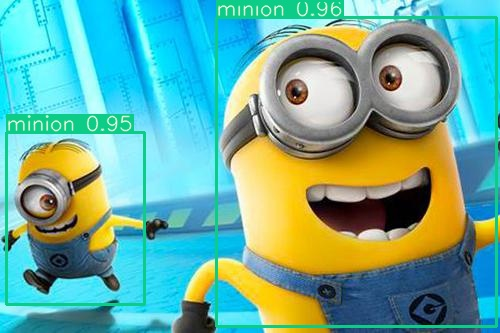

In [47]:
Image(filename='train_out/img194.jpg', width=400)

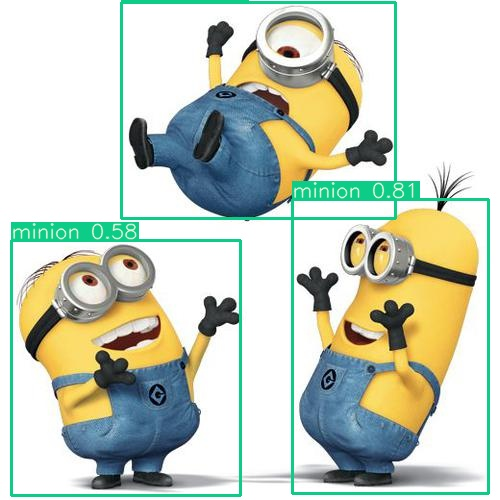

In [27]:
Image(filename='train_out/img045.jpg', height=300)

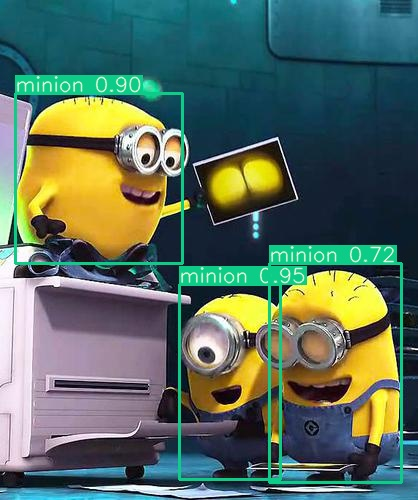

In [28]:
Image(filename='train_out/img012.jpg', height=300)

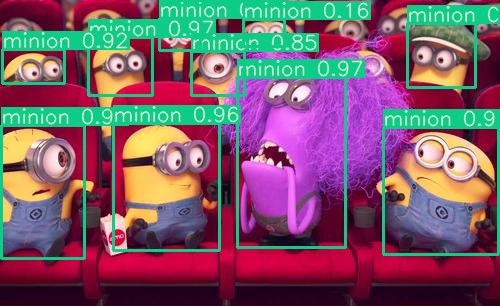

In [51]:
Image(filename='train_out/img434.jpg', width=400)

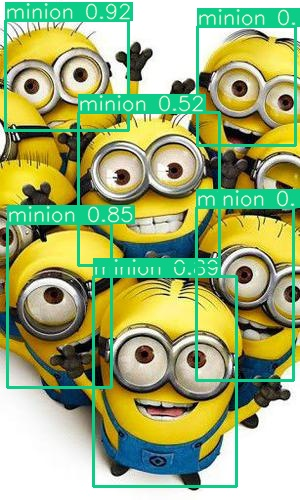

In [31]:
Image(filename='train_out/img104.jpg', height=400)

Save the trained model weights and the inferred samples in my drive

In [0]:
!cp "weights/last.pt" "/content/gdrive/My Drive/EVA4-Workspace/last.pt"

In [35]:
import shutil
shutil.make_archive("trained_samples", 'zip', "train_out")

'/content/YoloV3/trained_samples.zip'

In [0]:
!cp "/content/YoloV3/trained_samples.zip" "/content/gdrive/My Drive/EVA4-Workspace/"

Perform minion object-detection on the video file dowloaded from youtube (https://www.youtube.com/watch?v=OcPRNIycl7U)

In [40]:
!python detect.py --conf-thres 0.3 --output "/content/Detected_Minions_Clip" --source "/content/Minions-clip.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/Detected_Minions_Clip', save_txt=False, source='/content/Minions-clip.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1674) /content/Minions-clip.mp4: 320x512 3 minions, Done. (0.019s)
video 1/1 (2/1674) /content/Minions-clip.mp4: 320x512 3 minions, Done. (0.017s)
video 1/1 (3/1674) /content/Minions-clip.mp4: 320x512 3 minions, Done. (0.017s)
video 1/1 (4/1674) /content/Minions-clip.mp4: 320x512 3 minions, Done. (0.018s)
video 1/1 (5/1674) /content/Minions-clip.mp4: 320x512 3 minions, Done. (0.017s)
video 1/1 (6/1674) /content/Minions-clip.mp4: 320x512 3 minions, Done. (0.017s)
video 1/1

Copy the minion-object detected clip to my drive

In [44]:
import shutil
shutil.make_archive("/content/detected_clip_out", "zip", "/content/Detected_Minions_Clip")

'/content/detected_clip_out.zip'

In [0]:
!cp "/content/detected_clip_out.zip" "/content/gdrive/My Drive/EVA4-Workspace/"

Tried to detect minions on unseen images.

Source: Internet and my camera

In [52]:
!python detect.py --conf-thres 0.3 --output "/content/detected_new_images" --source "/content/new_imgs"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/detected_new_images', save_txt=False, source='/content/new_imgs', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/18 /content/new_imgs/img00.jpg: 512x384 1 minions, Done. (0.020s)
image 2/18 /content/new_imgs/img01.jpg: 512x384 2 minions, Done. (0.018s)
image 3/18 /content/new_imgs/img02.jpg: 384x512 Done. (0.019s)
image 4/18 /content/new_imgs/img03.jpg: 512x384 1 minions, Done. (0.020s)
image 5/18 /content/new_imgs/img04.jpg: 512x320 1 minions, Done. (0.020s)
image 6/18 /content/new_imgs/img05.jpg: 512x384 1 minions, Done. (0.026s)
image 7/18 /content/new_imgs/img06.jpg: 384x512 2 minions, Done. (

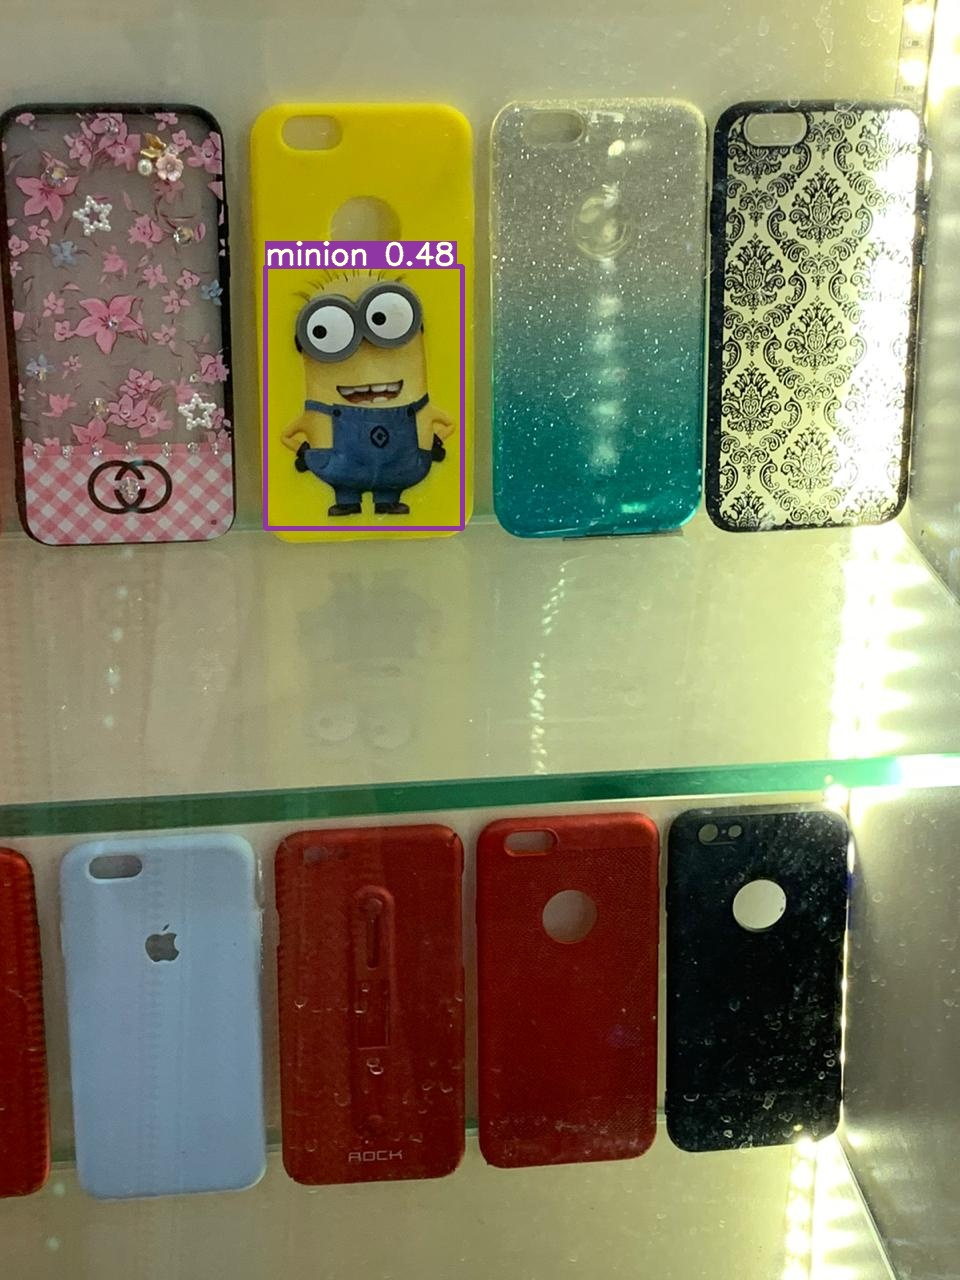

In [93]:
Image(filename='/content/detected_unseen_images/img03.jpg', height=400)

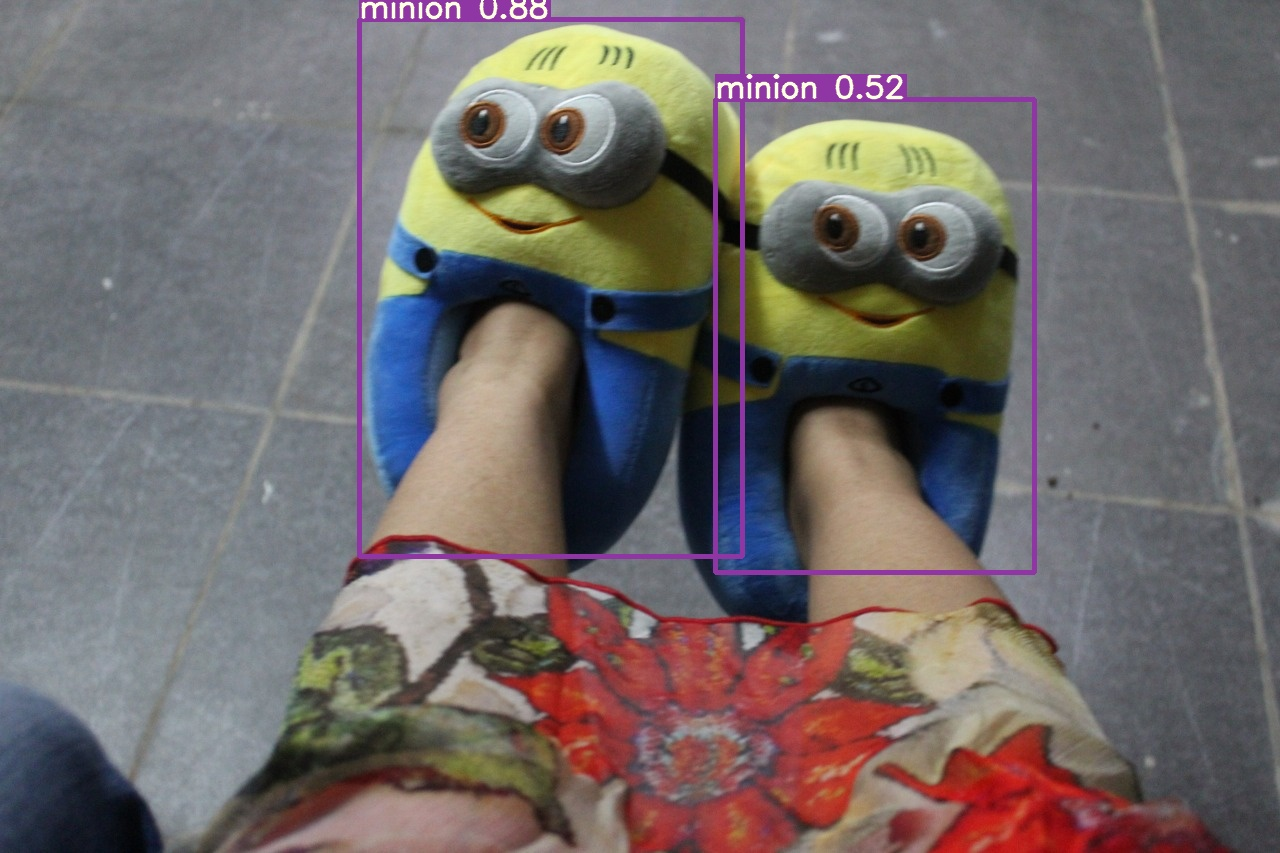

In [95]:
Image(filename='/content/detected_unseen_images/img06.jpg', width=400)

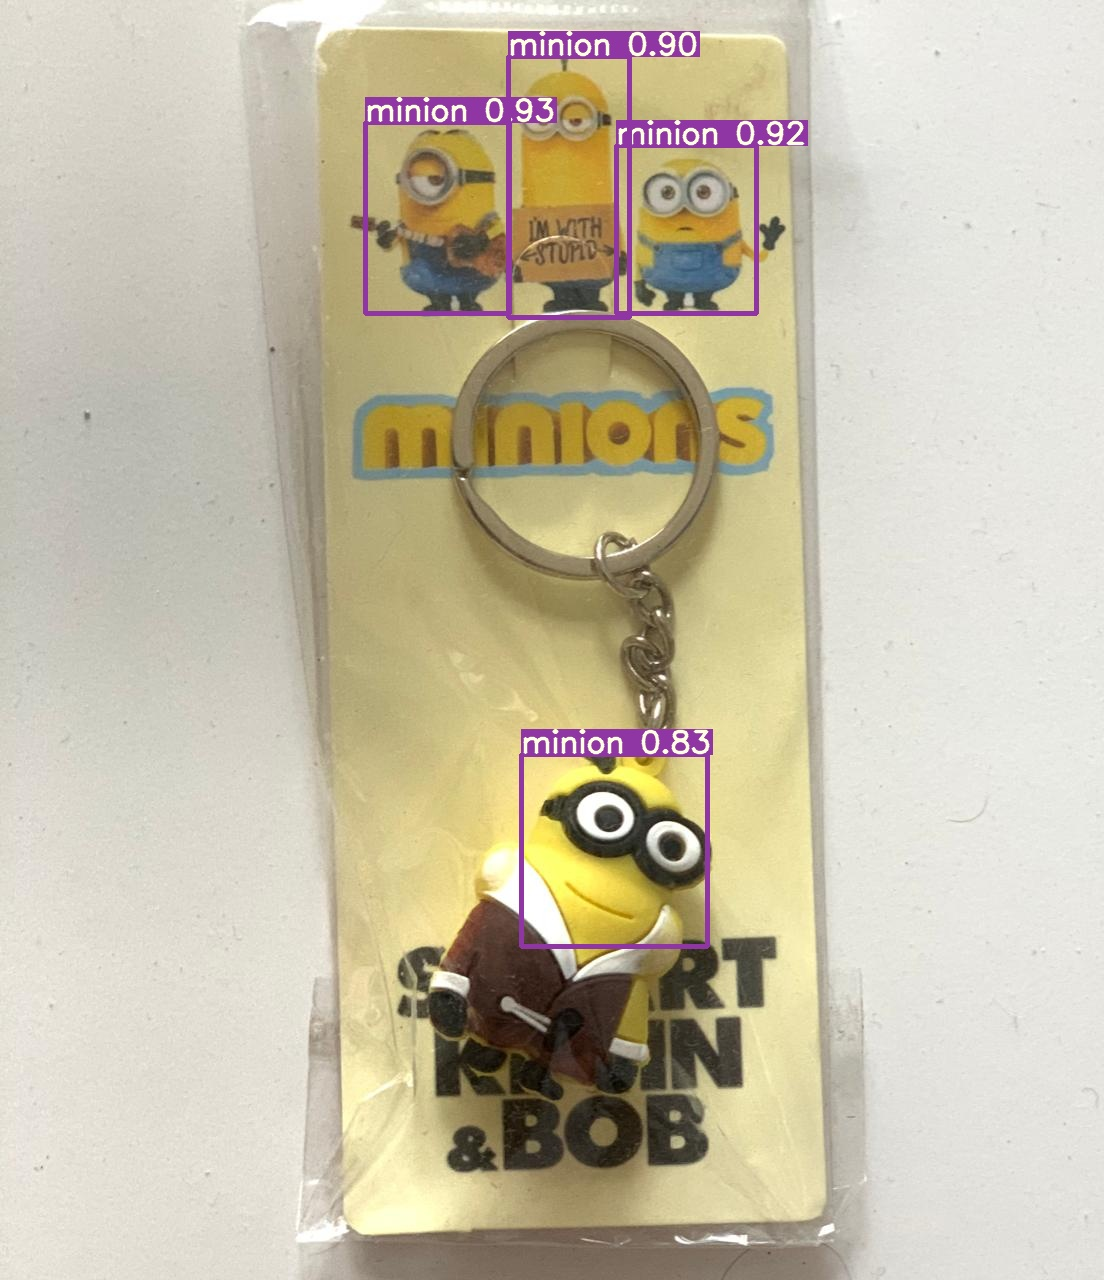

In [98]:
Image(filename='/content/detected_unseen_images/img08.jpg', height=400)

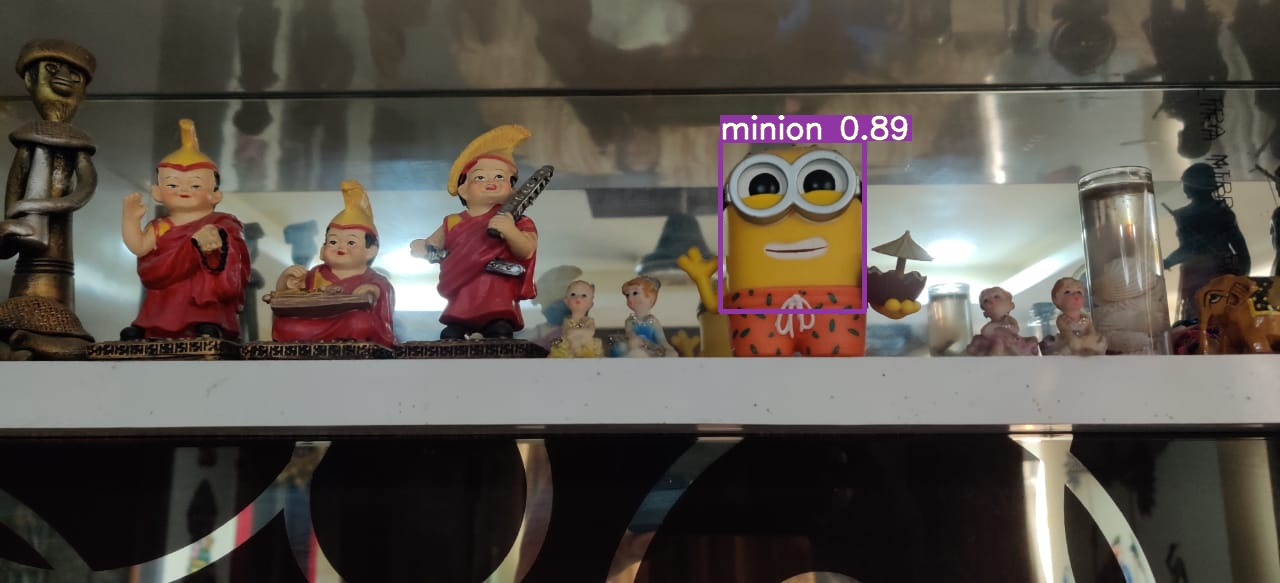

In [101]:
Image(filename='/content/detected_unseen_images/img13.jpg', width=400)